In [3]:
import numpy as np
import pandas as pd
import matplotlib as mpl

In [4]:
## 수익률 파일 호출

monthly_profit = pd.read_csv('Test_CSV/937501/trade_history_daily_937501.csv')
print(monthly_profit)

           날짜  매수 종목수  매도 종목수  남은 종목수  일일수익률   누적수익률         총자산       남은 현금
0    20170102       8       4       4   1.36    1.36  10136268.0   6601856.0
1    20170103       0       4       1  -0.13    1.23  10122807.0   9460317.0
2    20170104       3       4       0   0.98    2.22  10221841.0  10221841.0
3    20170105       3       2       1   0.65    2.88  10288277.0   9375665.0
4    20170106       7       2       6   0.24    3.13  10312978.0   4858398.0
..        ...     ...     ...     ...    ...     ...         ...         ...
744  20200117       4       7       1   0.99  297.01  39701020.0  36208520.0
745  20200120       6       5       3   1.23  301.90  40189715.0  30769915.0
746  20200121       6       7       2  -0.62  299.39  39938940.0  32946700.0
747  20200122       7       5       4   0.60  301.77  40177362.0  25912562.0
748  20200123       5       8       1  -0.68  299.03  39902500.0  36492000.0

[749 rows x 8 columns]


In [18]:
## 일별 수익률 평균 및 표준편차, 최대 - 최소 수익률 편차 구하기
avg_day_profit = round(monthly_profit['일일수익률'].mean(), 3)
std_day_profit = round(monthly_profit['일일수익률'].std(), 3)
max_min_gap_day_profit = monthly_profit['일일수익률'].max() - monthly_profit['일일수익률'].min()

print('ㅡㅡㅡㅡㅡ')
print(avg_day_profit, std_day_profit, max_min_gap_day_profit)

## 일별 매수, 매도 종목수 평균 구하기
avg_day_buy = round(monthly_profit['매수 종목수'].mean(), 3)
avg_day_sell = round(monthly_profit['매도 종목수'].mean(), 3)

print('ㅡㅡㅡㅡㅡ')
print(avg_day_buy, avg_day_sell)
print('ㅡㅡㅡㅡㅡ')

ㅡㅡㅡㅡㅡ
0.189 0.887 7.12
ㅡㅡㅡㅡㅡ
4.393 4.495
ㅡㅡㅡㅡㅡ


In [20]:
# 가설 : 일별 트레이딩 종목수와 일별수익률간에는 관계가 있을 것이다.
## 데이터프레임 곱을 통해 확인해본다.

monthly_profit['매수수량 - 수익률곱'] = monthly_profit['일일수익률'].mul(monthly_profit['매수 종목수'])
monthly_profit['매도수량 - 수익률곱'] = monthly_profit['일일수익률'].mul(monthly_profit['매도 종목수'])

print(monthly_profit[['날짜','매수수량 - 수익률곱','매도수량 - 수익률곱']])

           날짜  매수수량 - 수익률곱  매도수량 - 수익률곱
0    20170102        10.88         5.44
1    20170103        -0.00        -0.52
2    20170104         2.94         3.92
3    20170105         1.95         1.30
4    20170106         1.68         0.48
..        ...          ...          ...
744  20200117         3.96         6.93
745  20200120         7.38         6.15
746  20200121        -3.72        -4.34
747  20200122         4.20         3.00
748  20200123        -3.40        -5.44

[749 rows x 3 columns]


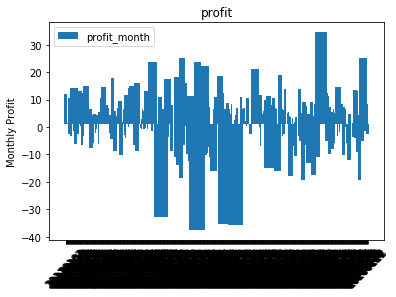

<Figure size 1440x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
import numpy as np

labels = monthly_profit['날짜']
means_bmp = monthly_profit['매수수량 - 수익률곱']
means_smp = monthly_profit['매도수량 - 수익률곱']

x = np.arange(len(labels))  # the label locations
width = 1  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x, means_bmp, means_smp, width, label='profit_month')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Monthly Profit')
ax.set_title('profit')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for label in ax.xaxis.get_ticklabels() :
    label.set_rotation(45)

'''
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
'''

## fig.tight_layout()
plt.figure(figsize=(20, 4))
plt.show()

## 왜 그래프가 안튀어나오는겨...(2020. 01. 26)

In [17]:
## 일별 매수, 매도 종목수 평균 구하기
avg_day_bmp = round(monthly_profit['매수수량 - 수익률곱'].mean(), 3)
avg_day_smp = round(monthly_profit['매도수량 - 수익률곱'].mean(), 3)

print('ㅡㅡㅡㅡㅡ')
print('Average 매수수량 - 수익률 곱 : ', avg_day_bmp)
print('Average 매도수량 - 수익률 곱 : ', avg_day_smp)
print('ㅡㅡㅡㅡㅡ')

ㅡㅡㅡㅡㅡ
Average 매수수량 - 수익률 곱 :  1.085
Average 매도수량 - 수익률 곱 :  1.056
ㅡㅡㅡㅡㅡ
